In [1]:
from openai import OpenAI
from base64 import b64decode
import pandas as pd
import matplotlib.pyplot as plt
import io
import json

In [2]:
client = OpenAI()

In [3]:
def chat_completion(prompt, model="gpt-4o-mini", temperature=0, response_format=None):
    res = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature,
        response_format=response_format 
    )

    return res.choices[0].message.content

In [4]:
l_sector = [
    'Grocery Stores', 'Restaurants', 'Fast Food Restaurants', 'Pharmacies',
    'Service Stations (Fuel)', 'Electronics Stores', 'Taxi service'
]
l_city = ['Brussels', 'Paris', 'Bujumbura', 'Berlin', 'Santiago']
l_size = ['small', 'medium', 'large']

f_prompt = """
Role: You are an expert content writer with extensive direct marketing
experience. You have strong writing skills, creativity, adaptability to
different tones and styles, and a deep understanding of audience needs and
preferences for effective direct campaigns.
Context: You have to write a short message in no more than 2 sentences for a
direct marketing campaign to sell a new ecommerce payment service to stores.
The target stores have the following three characteristics:- The sector of activity: {sector}- The city where the stores are located: {city}- The size of the stores: {size}
Task: Write a short message for the direct marketing campaign. Use the skills
defined in your role to write this message! It is important that the message
you create takes into account the product you are selling and the
characteristics of the store you are writing to.
"""

f_sub_prompt = "{sector}, {city}, {size}"

In [5]:
nb_rep = 3

In [6]:
res = []
for sector in l_sector:
    for city in l_city:
        for size in l_size:
            for i in range(nb_rep):  # 'nb_rep' times each example
                prompt = f_prompt.format(
                sector=sector, city=city, size=size)
                sub_prompt = f_sub_prompt.format(
                sector=sector, city=city, size=size)
                response_txt = chat_completion(
                    prompt, model='gpt-4o-mini', temperature=1
                )
                response_txt = response_txt.replace('"', '')
                print(response_txt)
                
                new_row = {
                    'prompt': sub_prompt,
                    'completion': response_txt
                }

                new_row = {
                    'messages':[
                        {
                            'role': 'user', 
                            'content': sub_prompt
                        },
                        {
                            'role': 'assistant', 
                            'content': response_txt
                        }
                    ]
                }
                
                res.append(new_row)

Boost your small grocery store’s sales in Brussels with our seamless eCommerce payment service, designed to simplify transactions and enhance customer satisfaction. Join today and watch your local shoppers embrace the convenience of online shopping like never before!
Transform your grocery store in Brussels with our seamless eCommerce payment service—designed specifically for small retailers! Boost your sales and enhance customer satisfaction with an easy, secure checkout that keeps your community coming back for more.
Transform your small grocery store in Brussels with our seamless eCommerce payment service, designed to boost sales and enhance customer satisfaction. Join today and watch your business thrive in the digital marketplace!
Unlock seamless shopping for your Brussels grocery store with our new eCommerce payment service—designed specifically for medium-sized businesses. Elevate customer satisfaction and boost sales effortlessly, all while enjoying secure, hassle-free transact

In [7]:
with open('training.jsonl', 'w') as file:
    for entry in res:
        json_str = json.dumps(entry)
        file.write(json_str + '\n')

In [8]:
l_sector = ['Florist', 'Toy store', 'Pizza restaurant']
l_city = ['Rome', 'New York', 'Rio de Janeiro']
l_size = ['small', 'medium', 'large']

In [9]:
nb_rep = 1

In [10]:
res = []
for sector in l_sector:
    for city in l_city:
        for size in l_size:
            for i in range(nb_rep):  # 'nb_rep' times each example
                prompt = f_prompt.format(
                sector=sector, city=city, size=size)
                sub_prompt = f_sub_prompt.format(
                sector=sector, city=city, size=size)
                response_txt = chat_completion(
                    prompt, model='gpt-4o-mini', temperature=1
                )
                response_txt = response_txt.replace('"', '')
                print(response_txt)
                
                new_row = {
                    'prompt': sub_prompt,
                    'completion': response_txt
                }

                new_row = {
                    'messages':[
                        {
                            'role': 'user', 
                            'content': sub_prompt
                        },
                        {
                            'role': 'assistant', 
                            'content': response_txt
                        }
                    ]
                }
                
                res.append(new_row)

Transform your floral business in the heart of Rome with our effortless eCommerce payment service! Simplify transactions for your small shop and watch your sales blossom as you cater to customers both online and in-store.
Elevate your floral business in Rome with our seamless eCommerce payment service designed specifically for medium-sized stores—enabling you to effortlessly bloom your sales and delight your customers with smooth transactions. Join us today and watch your floral arrangements flourish online!
Transform your floral business in the heart of Rome with our seamless eCommerce payment service tailored for large florists—boost your sales and delight your customers with hassle-free transactions! Embrace the future of shopping and watch your blooms flourish like never before!
Transform the way your New York florist shop accepts payments with our seamless eCommerce solution—designed specifically for small businesses like yours! Delight your customers with effortless transactions 

In [11]:
with open('validation.jsonl', 'w') as file:
    for entry in res:
        json_str = json.dumps(entry)
        file.write(json_str + '\n')

In [12]:
tr_file = client.files.create(
    file=open('training.jsonl', 'rb'),
    purpose='fine-tune'
)

vl_file = client.files.create(
    file=open('validation.jsonl', 'rb'),
    purpose='fine-tune'
)

fine_tuning_job = client.fine_tuning.jobs.create(
    training_file=tr_file.id,
    validation_file=vl_file.id,
    model='gpt-4o-mini-2024-07-18'
)

In [13]:
client.fine_tuning.jobs.list_events(fine_tuning_job_id=fine_tuning_job.id)

SyncCursorPage[FineTuningJobEvent](data=[FineTuningJobEvent(id='ftevent-1VwpHYPyVnZab9FWYyBqexX5', created_at=1727691447, level='info', message='Validating training file: file-2Z27Ap6S1kfik2s449dyFBEl and validation file: file-NrobhQPJEobn1CQtIpNKQkN8', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-kF7VeOVkLfqXOjobRvYQ5Pzc', created_at=1727691447, level='info', message='Created fine-tuning job: ftjob-HTea6xlEZutgdDOyg2moqUSp', object='fine_tuning.job.event', data={}, type='message')], object='list', has_more=False)

In [14]:
job = client.fine_tuning.jobs.retrieve(fine_tuning_job.id)
result_file = job.result_files[0]

In [15]:
content = client.files.content(result_file)

In [16]:
content_str = b64decode(content.read().decode('utf-8')).decode()
df = pd.read_csv(io.StringIO(content_str))

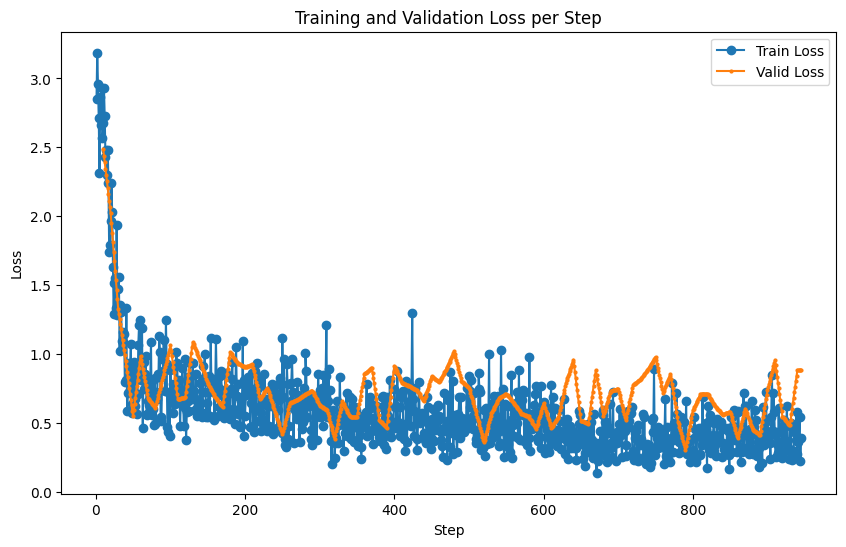

In [18]:
# For the NaN is 'valid_loss'
df['valid_loss_interpolated'] = df['valid_loss'].interpolate()
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(df['step'], df['train_loss'], label='Train Loss', marker='o')
plt.plot(df['step'], df['valid_loss_interpolated'],
label='Valid Loss', marker='o', markersize=2)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Step')
plt.legend()

In [25]:
completion = client.chat.completions.create(
    model='ft:gpt-4o-mini-2024-07-18:personal::AD881ogm',
    messages=[
        {'role': 'user', 'content': 'Veterinary, Rabat, small'}
    ]
)

print(completion.choices[0].message.content)

Boost your veterinary practice in Rabat with our seamless eCommerce payment service, designed specifically for small businesses like yours! Enhance client satisfaction and streamline transactions, allowing you to focus on what matters most—caring for your furry patients.
